In [14]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
# 의사결정 나무
from sklearn.tree import DecisionTreeClassifier
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
# train_test_split
from sklearn.model_selection import train_test_split
# 정확도, 재현율, 정밀도
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
titan_df = pd.read_csv('D:/pythonTest/train.csv')

In [34]:
print(train_df.info())
print('\n###결측값###\n', train_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

###결측값###
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2

In [36]:
titan_df.Age = titan_df.Age.fillna(np.mean(titan_df.Age))
titan_df.Cabin = titan_df.Cabin.fillna('N')
titan_df.Embarked = titan_df.Embarked.fillna('N')
titan_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [44]:
print('Sex값 분포\n',titan_df.Sex.value_counts(),'\n')
print('Cabin값 분포\n',titan_df.Cabin.value_counts(), titan_df.shape[0], '\n')
print('Embarked값 분포\n',titan_df.Embarked.value_counts())

Sex값 분포
 male      577
female    314
Name: Sex, dtype: int64 

Cabin값 분포
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64 891 

Embarked값 분포
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [60]:
def fillna(data_df):
    data_df.Age.fillna(np.mean(data_df.Age), inplace=True)
    data_df.Cabin.fillna('N', inplace=True)
    data_df.Embarked.fillna('N', inplace=True)
    return data_df

In [61]:
def drop_ftr(data_df):
    data_df.drop(['Ticket', 'Name', 'PassengerId', 'Cabin', 'Embarked'], axis=1, inplace=True)
    return data_df

In [62]:
from sklearn.preprocessing import LabelEncoder

def le_encode_ftrs(data_df):
    features = ['Sex']
    for ftr in features:
        le=LabelEncoder()
        le=le.fit(data_df[ftr])
        data_df[ftr]=le.transform(data_df[ftr])
    return data_df

In [63]:
def preprocessing_ftrs(data_df):
    data_df = fillna(data_df)
    data_df = drop_ftr(data_df)
    data_df = le_encode_ftrs(data_df)
    return data_df

In [64]:
titanic_df = pd.read_csv('D:/pythonTest/train.csv')
y_titanic = titanic_df['Survived']
X_titanic = titanic_df.drop('Survived', axis=1)

preprocessing_ftrs(X_titanic)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.000000,1,0,7.2500
1,1,0,38.000000,1,0,71.2833
2,3,0,26.000000,0,0,7.9250
3,1,0,35.000000,1,0,53.1000
4,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000
887,1,0,19.000000,0,0,30.0000
888,3,0,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic,
                                                   test_size=.2, random_state=11)

In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as acc_sc # 정확도
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score




# 의사결정나무, 랜덤포레스트, 로지스틱 회귀분석 객체화
decisiontree = DecisionTreeClassifier(random_state=11)
randomforest = RandomForestClassifier(random_state=11)
logisticRegression = LogisticRegression(random_state=11)

# 의사결정나무 학습/예측평가
decisiontree.fit(X_train, y_train)
decisiontree_predict = decisiontree.predict(X_test)
print('의사결정나무 정확도:', 
      acc_sc(y_test, decisiontree_predict),'\n',
      '의사결정나무 재현율:',
      recall_score(y_test, decisiontree_predict), '\n',
      '의사결정나무 정밀도:',
      precision_score(y_test, decisiontree_predict),'\n',
      '하이퍼_파라미터 추출:', 
      decisiontree.get_params(), '\n')

# 랜덤포레스트 학습/예측평가
randomforest.fit(X_train, y_train)
randomforest_predict = randomforest.predict(X_test)
print('랜덤포레스트 정확도:', 
      acc_sc(y_test, randomforest_predict),'\n',
      '랜덤포레스트 재현율:',
      recall_score(y_test, randomforest_predict), '\n',
      '랜덤포레스트 정밀도:',
      precision_score(y_test, randomforest_predict),'\n',
      '하이퍼_파라미터 추출:', 
      randomforest.get_params(), '\n')

# 로지스틱 회귀분석 학습/예측평가
logisticRegression.fit(X_train, y_train)
logisticRegression_predict = logisticRegression.predict(X_test)
print('로지스틱 회귀분석 정확도:', 
      acc_sc(y_test, logisticRegression_predict),'\n',
      '로지스틱 회귀분석 재현율:',
      recall_score(y_test, logisticRegression_predict),'\n',
      '로지스틱 회귀분석 정밀도:',
      precision_score(y_test, logisticRegression_predict),'\n',
      '하이퍼_파라미터 추출:', 
      logisticRegression.get_params())

의사결정나무 정확도: 0.7932960893854749 
 의사결정나무 재현율: 0.7049180327868853 
 의사결정나무 정밀도: 0.6935483870967742 
 하이퍼_파라미터 추출: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 11, 'splitter': 'best'} 

랜덤포레스트 정확도: 0.8603351955307262 
 랜덤포레스트 재현율: 0.7704918032786885 
 랜덤포레스트 정밀도: 0.8103448275862069 
 하이퍼_파라미터 추출: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 11, 'verbose': 0, 'warm_start': False} 

로지스틱 회귀분석 정확도: 0.8435754189944135 
 로지스틱 회귀분석 재현

In [130]:
from sklearn.model_selection import GridSearchCV
import time

start_time = time.time()
params = {'max_depth':[6,8,10,12,16,20,24]}

grid_dt_clf = GridSearchCV(decisiontree, param_grid=params, scoring='accuracy', cv=5)
grid_dt_clf.fit(X_train, y_train)

print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_dt_clf.best_score_))
print('GridSearchCV 최적 하이퍼파라미터:{0}'.format(grid_dt_clf.best_params_))


total_time = time.time()-start_time
print('수행시간: {0} 초'.format(total_time))


GridSearchCV 최고 평균 정확도 수치:0.7977
GridSearchCV 최적 하이퍼파라미터:{'max_depth': 10}
수행시간: 0.2545809745788574 초


In [131]:
# test_data를 적용하여 max_depth에 따른 값을 확인

max_depths = [6,8,10,12,16,20,24]

cv_results = []
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=11)
    dt_clf.fit(X_train, y_train)
    pred_dt = dt_clf.predict(X_test)
    accuracy_dt = accuracy_score(y_test, pred_dt)
    cv_results.append(accuracy_dt)
    
    print('max_dept = {0} 정확도: {1:.4f}'.format(depth, accuracy_dt))

max_dept = 6 정확도: 0.8771
max_dept = 8 정확도: 0.8492
max_dept = 10 정확도: 0.8101
max_dept = 12 정확도: 0.8101
max_dept = 16 정확도: 0.8045
max_dept = 20 정확도: 0.7989
max_dept = 24 정확도: 0.7933


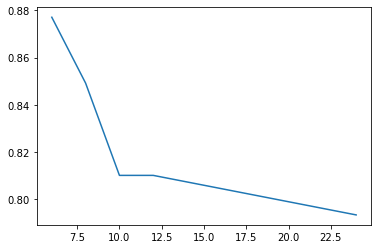

In [132]:
plt.plot([6,8,10,12,16,20,24], cv_results)

In [133]:
start_time = time.time()
params = {'max_depth':[6,8,10,12,16,20,24]}

grid_rf_clf = GridSearchCV(randomforest, param_grid=params, scoring='accuracy', cv=5)
grid_rf_clf.fit(X_train, y_train)

print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_rf_clf.best_score_))
print('GridSearchCV 최적 하이퍼파라미터:{0}'.format(grid_rf_clf.best_params_))


total_time = time.time()-start_time
print('수행시간: {0} 초'.format(total_time))

GridSearchCV 최고 평균 정확도 수치:0.8160
GridSearchCV 최적 하이퍼파라미터:{'max_depth': 8}
수행시간: 7.771795272827148 초


In [134]:
max_depths2 = [6,8,10,12,16,20,24]

cv_results2 = []
for depth in max_depths2:
    rf_clf = RandomForestClassifier(max_depth=depth, random_state=11)
    rf_clf.fit(X_train, y_train)
    pred_rf = rf_clf.predict(X_test)
    accuracy_rf = accuracy_score(y_test, pred_dt)
    cv_results2.append(accuracy_rf)
    
    print('max_dept = {0} 정확도:{1:.4f}'.format(depth, accuracy_rf))

max_dept = 6 정확도:0.7933
max_dept = 8 정확도:0.7933
max_dept = 10 정확도:0.7933
max_dept = 12 정확도:0.7933
max_dept = 16 정확도:0.7933
max_dept = 20 정확도:0.7933
max_dept = 24 정확도:0.7933


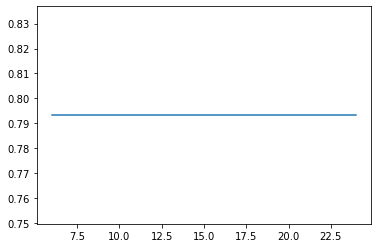

In [135]:
plt.plot([6,8,10,12,16,20,24], cv_results2)

In [136]:
start_time = time.time()
params = {'max_depth':[6,8,10,12,16,20,24]}

grid_lr_clf = GridSearchCV(logisticRegression, param_grid=params, scoring='accuracy', cv=5)
grid_lr_clf.fit(X_train, y_train)

print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_lr_clf.best_score_))
print('GridSearchCV 최적 하이퍼파라미터:{0}'.format(grid_lr_clf.best_params_))


total_time = time.time()-start_time
print('수행시간: {0} 초'.format(total_time))


ValueError: Invalid parameter max_depth for estimator LogisticRegression(random_state=11). Check the list of available parameters with `estimator.get_params().keys()`.